In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [167]:
# importing training data set
train=pd.read_csv('train_housing.csv')

In [168]:
#imorting testinng data set
test=pd.read_csv('test_housing.csv')

In [169]:
# merging training and testing data set for the ease of EDA andcleaning of the data.
train['source']='train'
test['source']='test'
df = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, df.shape)

(1168, 82) (292, 81) (1460, 82)


### Understanding the data

In [172]:
# Glimpse of the data set --first 30 rows.

cm = sns.light_palette("green", as_cmap=True)
df.head(30).style.background_gradient(cmap=cm)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,127,120,RL,nan,4928,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.000000,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.000000,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,nan,nan,nan,0,2,2007,WD,Normal,128000.000000,train
1,889,20,RL,95.000000,15865,Pave,nan,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.000000,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.000000,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,nan,nan,nan,0,10,2007,WD,Normal,268000.000000,train
2,793,60,RL,92.000000,9920,Pave,nan,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.000000,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,nan,nan,nan,0,6,2007,WD,Normal,269790.000000,train
3,110,20,RL,105.000000,11751,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.000000,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.000000,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,nan,MnPrv,nan,0,1,2010,COD,Normal,190000.000000,train
4,422,20,RL,nan,16635,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.000000,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.000000,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,nan,nan,nan,0,6,2009,WD,Normal,215000.000000,train
5,1197,60,RL,58.000000,14054,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.000000,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.000000,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,nan,nan,nan,0,11,2006,New,Partial,219210.000000,train
6,561,20,RL,nan,11341,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.000000,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.000000,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,nan,nan,nan,0,5,2010,WD,Normal,121500.000000,train
7,1041,20,RL,88.000000,13125,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.000000,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.000000,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,nan,GdPrv,nan,0,1,2006,WD,Normal,155000.000000,train
8,503,20,RL,70.000000,9170,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,nan,Detchd,1965.000000,Unf,2,461,Fa,Fa,Y,0,0,184,0,0

In [173]:
# find the information aboutth data types and count of non null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

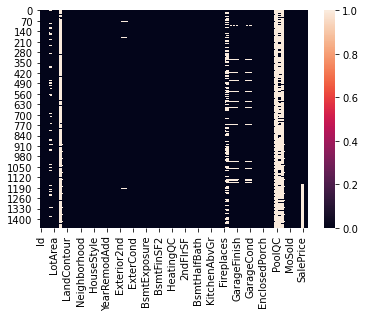

In [175]:
# looking at the null values in the data set with the help of heatmap.
sns.heatmap(df.isnull())

In [176]:
# feature values present in the data set 
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [177]:
# Finding out the varaibles with numeric values.
numeric_train = df.select_dtypes(exclude=['object'])
print(numeric_train.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [178]:
# finding out the categorical variables.
object_train = df.select_dtypes(exclude=['int64','float64'])
print(object_train.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'source'],
      dtype='object')


### EDA---Exploratory Data Analysis

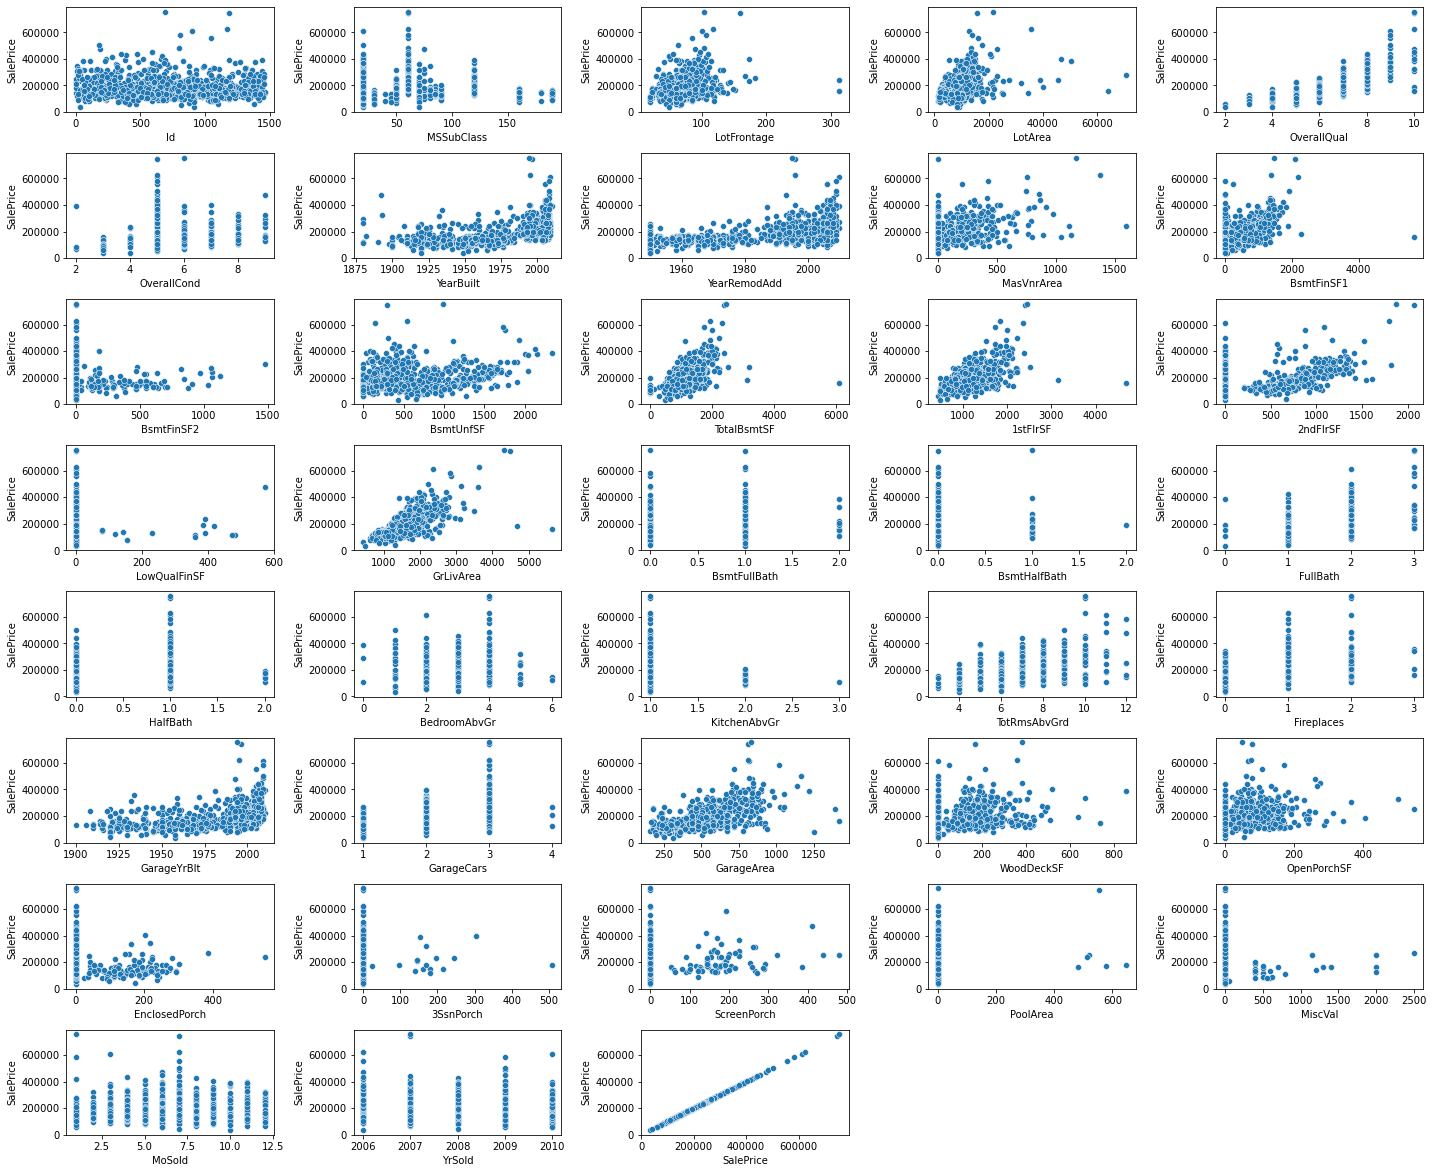

In [179]:
# ploting the scatterplot to look into the numeric varables.
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

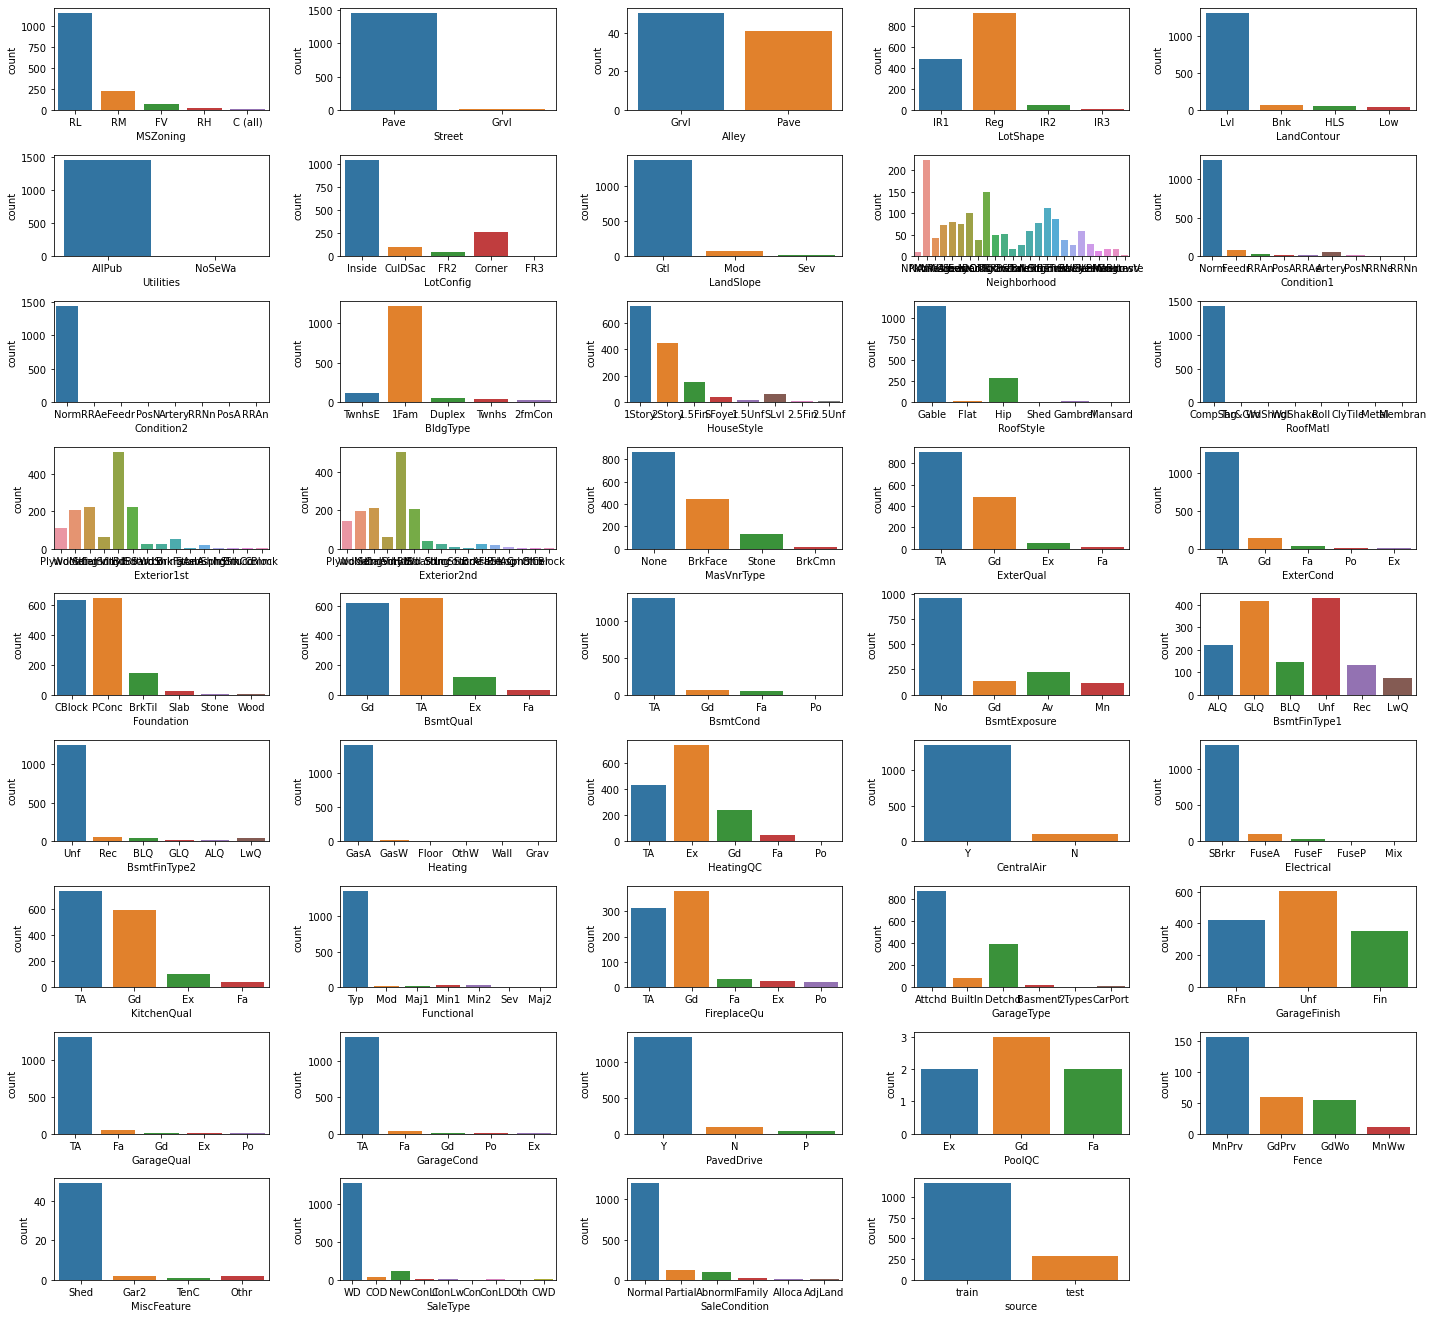

In [180]:
# ploting countplot of the categorical variables.
fig = plt.figure(figsize=(20,20))
for index in range(len(object_train.columns)):
    plt.subplot(10,5,index+1)
    sns.countplot(x=object_train.iloc[:,index], data=object_train.dropna())
fig.tight_layout(pad=1.0)

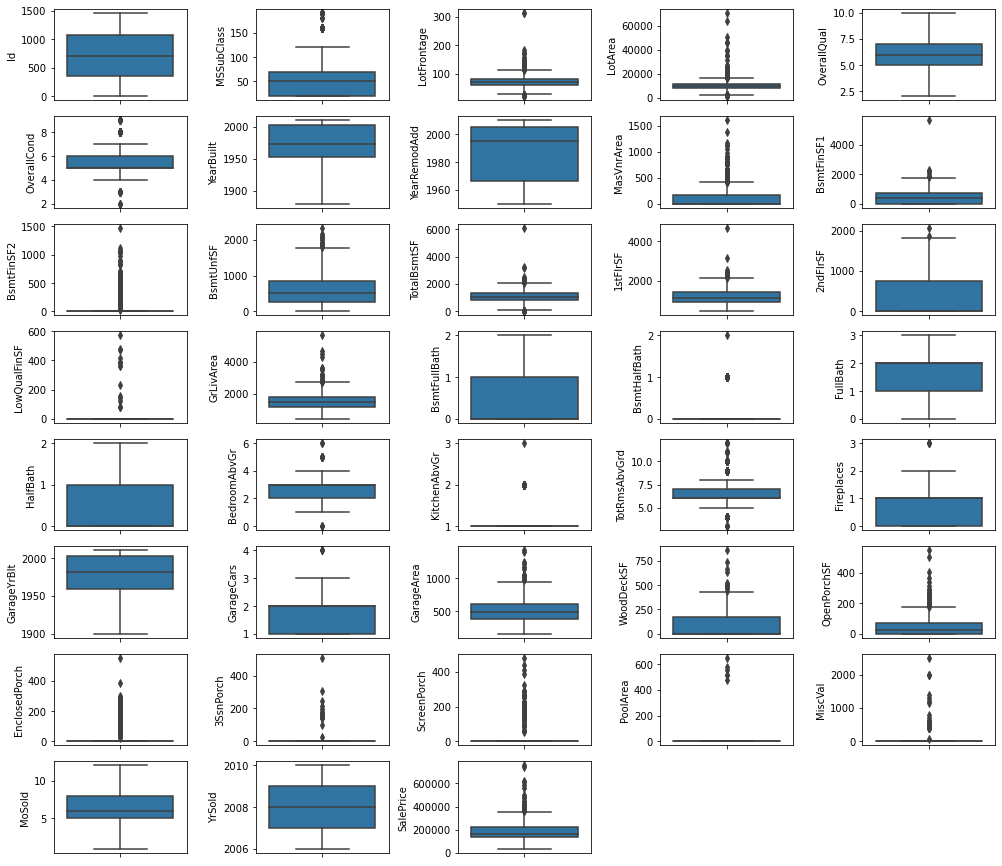

In [181]:
# ploting boxplot to find out outliers present in the numeric variables.
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(numeric_train):
    plt.subplot(10,5,index+1)
    sns.boxplot(y=col, data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

In [182]:
# finding the correlation of variavles with SalePrice
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.789185
GrLivArea,0.707300
GarageCars,0.628329
GarageArea,0.619000
TotalBsmtSF,0.595042
1stFlrSF,0.587642
FullBath,0.554988
TotRmsAbvGrd,0.528363
YearBuilt,0.514408


<AxesSubplot:>

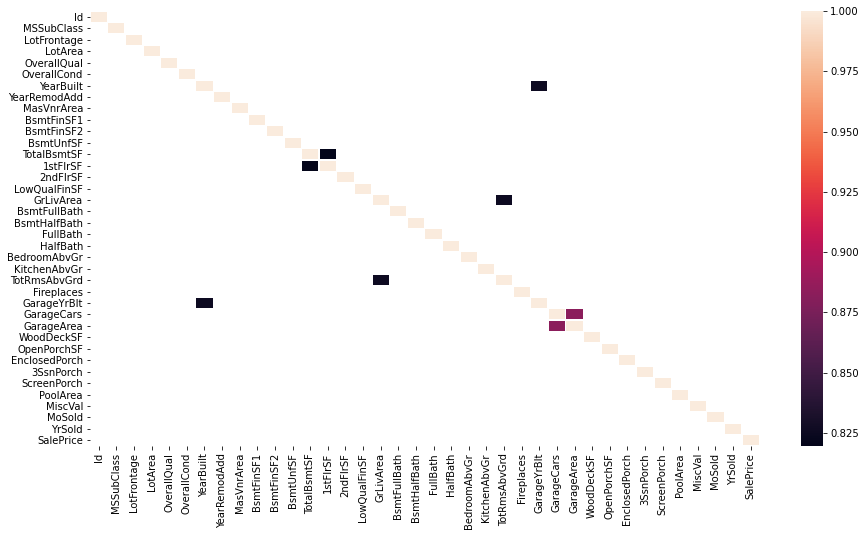

In [183]:
# finding the correlation amond different varables.
plt.figure(figsize=(15,8))
sns.heatmap(numeric_train.corr(),linewidths=0.5,mask = correlation <0.8)

<AxesSubplot:title={'center':'Number of missing rows'}, xlabel='features', ylabel='sum'>

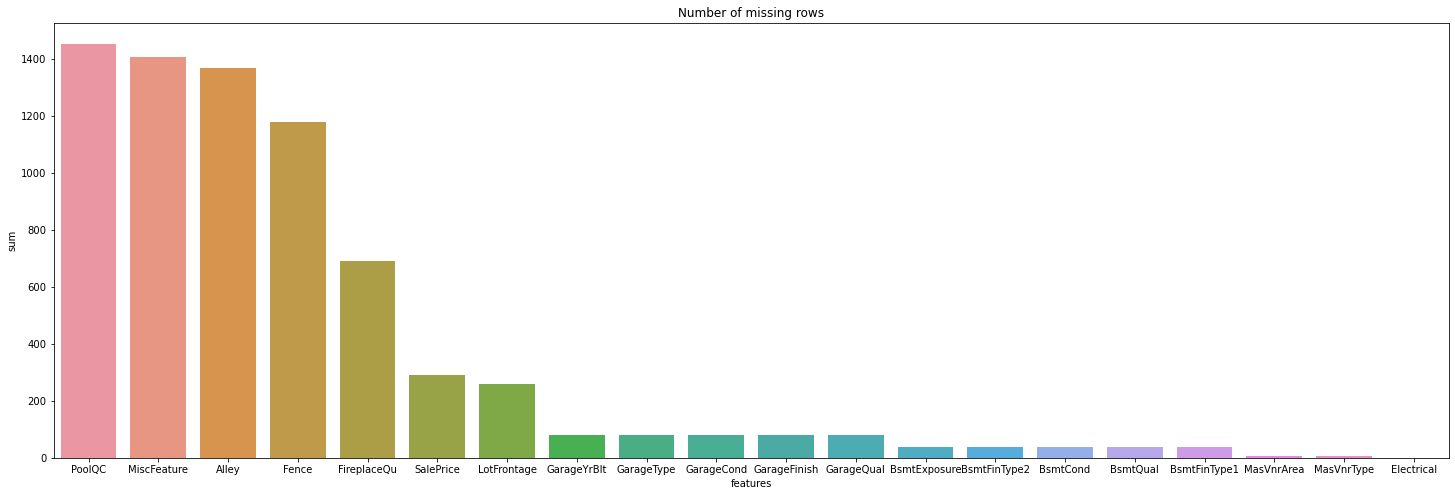

In [184]:
# ploting the number of missing rows in the variables.

plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(df.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

This data visualisation give us a lots of informations for both numerical and categorical values

After this quick Data visualisation at the first sight some features doesn't impact much the sale price, thus to have a quick model I will remove the following categorical features : ['Street', 'RoofMatl', 'PoolQC', 'Alley', 'MiscFeature', 'Condition2', 'BsmtFinType2', 'Utilities', 'Fence'] and the following numerical features ['MonthSold', 'YrSold', 'PoolArea', '3SsnPorch', 'MiscVal', 'EnclosedPorch', 'ScreenPorch', 'LowQualFinSF', 'BsmtFullBath','BsmtHalfBath','HalfBath','WoodDeckSF']

Moreover, some "numerical" features at first appeared to be categorical in fact

Fireplaces
GarageCars
MSSubClass
LotRmsAbvGrd
These needed to be treated as categorical features.

### Data Preprocessing

In this part the following tasks will be performed :

Removing Redundant Features
Dealing with Outliers
Filling in missing values

We can see with the Confusion matrix above that some features are highly correlated with one another thus it does not add any information and it could even lower the "power" of the prediction model

There are also some features with too much missing values ( more than 1350 over 1450) so we can just drop these columns. We can also drop some useless features such as the month and the year the house was sold.

#### Dealing with redundant and useless features

In [185]:
#Redundant values
df.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True) 

#Too much missing values
df.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

#Useless features
df.drop(['MoSold','YrSold'], axis=1, inplace=True)

The next cells remove the features with mostly 1 value in it. If a column has more than 96% of an unique value we can say that this feature is useless since it doesn't add any information.

In [186]:
cat_col = df.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
df = df.drop(overfit_cat, axis=1)

In [187]:
num_col = df.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
df = df.drop(overfit_num, axis=1)

#### Dealing with Outliers

Removing outliers will prevent our models performance from being affected by extreme values. From the boxplot earlier, the following features with extreme outliers were highlighted:

LotFrontage
LotArea
BsmtFinSF1
TotalBsmtSF
GrLivArea

the outliers will be removed based on certain threshold value.

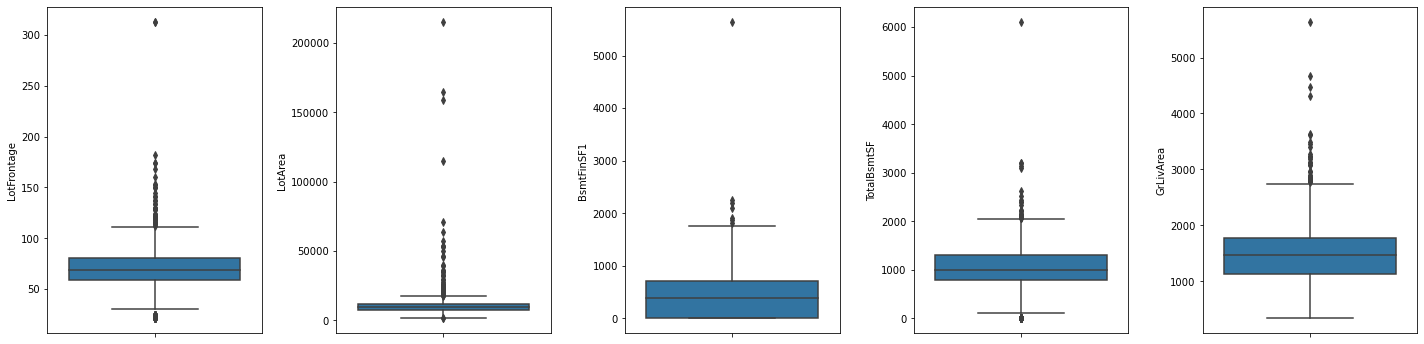

In [188]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=df)
fig.tight_layout(pad=1.5)

In [189]:
df = df.drop(df[df['LotFrontage'] > 200].index)
df = df.drop(df[df['LotArea'] > 100000].index)
df = df.drop(df[df['BsmtFinSF1'] > 4000].index)
df = df.drop(df[df['TotalBsmtSF'] > 5000].index)
df = df.drop(df[df['GrLivArea'] > 4000].index)

#### Treating Missing Values

How to handle missing values ? It will depends on the types of variables present in the data set. For numerical features there are multiple methods : the mean, median or any other numerical value can be taken. For categorical value it is possible to fill with a "None" category or with the most_frequent category.

Catgorical featured will be mapped and encoded. To do so, as the data set has ordinal features (categorical feature where there is an order between the categories such as : Beginner, Intermediate, Expert for instance that can be mapped as: 0 = Beginner, 1 = Intermediate, 2 = Expert. This way the model will treat 2 as bigger than 0 which is correct in this case.

The second type of categorical data are the characteristics, such as colour for instance. colours cannot be treated  as ordered categories. In this case one hot encoder will be used.

In [190]:
#filling the missing values.

cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

df[cat] = df[cat].fillna("NA")

In [191]:
#categorical
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
df[cols] = df.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

In [192]:
#for correlated relationship
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
df['GarageArea'] = df.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [193]:
#numerical
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
df[cont] = df[cont] = df[cont].fillna(df[cont].mean())

In [194]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [195]:
# Mapping the values

ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}


ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    df[col] = df[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    df[col] = df[col].map(fintype_map)

df['BsmtExposure'] = df['BsmtExposure'].map(expose_map)
df['Fence'] = df['Fence'].map(fence_map)

In [196]:
# Checking the changed values

cm = sns.light_palette("green", as_cmap=True)
df.head(10).style.background_gradient(cmap=cm)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,source
0,127,120,RL,32.285714,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,Plywood,Plywood,None,0.000000,3,3,CBlock,4,3,1,5,120,1,0,958,1078,3,Y,SBrkr,0,958,0,0,2,0,2,1,3,Typ,1,3,Attchd,RFn,440,3,3,Y,0,205,0,0,0,WD,Normal,128000.000000,train
1,889,20,RL,95.000000,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,1Fam,1Story,8,6,1970,1970,Flat,Wd Sdng,Wd Sdng,None,0.000000,4,4,PConc,3,4,4,5,351,3,823,1043,2217,5,Y,SBrkr,0,2217,1,0,2,0,4,1,4,Typ,1,3,Attchd,Unf,621,3,3,Y,81,207,0,224,0,WD,Normal,268000.000000,train
2,793,60,RL,92.000000,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,1Fam,2Story,7,5,1996,1997,Gable,MetalSd,MetalSd,None,0.000000,4,3,PConc,4,3,3,6,862,1,0,255,1117,5,Y,SBrkr,886,2013,1,0,2,1,3,1,3,Typ,1,3,Attchd,Unf,455,3,3,Y,180,130,0,0,0,WD,Normal,269790.000000,train
3,110,20,RL,105.000000,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,1977,1977,Hip,Plywood,Plywood,BrkFace,480.000000,3,3,CBlock,4,3,1,4,705,1,0,1139,1844,5,Y,SBrkr,0,1844,0,0,2,0,3,1,3,Typ,1,3,Attchd,RFn,546,3,3,Y,0,122,0,0,3,COD,Normal,190000.000000,train
4,422,20,RL,81.288889,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,1Fam,1Story,6,7,1977,2000,Gable,CemntBd,CmentBd,Stone,126.000000,4,3,CBlock,4,3,1,5,1246,1,0,356,1602,4,Y,SBrkr,0,1602,0,1,2,0,3,1,4,Typ,1,3,Attchd,Fin,529,3,3,Y,240,0,0,0,0,WD,Normal,215000.000000,train
5,1197,60,RL,58.000000,14054,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,7,5,2006,2006,Gable,VinylSd,VinylSd,None,0.000000,4,3,PConc,4,3,3,1,0,1,0,879,879,5,Y,SBrkr,984,1863,0,0,2,1,4,1,4,Typ,1,4,BuiltIn,Fin,660,3,3,Y,100,17,0,0,0,New,Partial,219210.000000,train
6,561,20,RL,74.437500,11341,IR1,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,1Story,5,6,1957,1996,Hip,Wd Sdng,Wd Sdng,BrkFace,180.000000,3,3,CBlock,4,3,1,5,1302,1,0,90,1392,3,Y,SBrkr,0,1392,1,0,1,1,3,1,3,Mod,1,4,Detchd,Unf,528,3,3,Y,0,0,0,95,0,WD,Normal,121500.000000,train
7,1041,20,RL,88.000000,13125,Reg,Lvl,Corner,Gtl,Sawyer,Norm,1Fam,1Story,5,4,1957,2000,Gable,Wd Sdng,Wd Sdng,BrkCmn,67.000000,3,3,CBlock,3,3,1,3,168,4,682,284,1134,5,Y,SBrkr,0,1803,1,0,2,0,3,1,3,Maj1,1,3,Attchd,RFn,484,3,3,Y,0,0,0,0,4,WD,Normal,155000.000000,train
8,503,20,RL,70.000000,9170,Reg,Lvl,Corner,Gtl,Edwards,Feedr,1Fam,1Story,5,7,1965,1965,Hip,MetalSd,MetalSd,None,0.000000,3,3,CBlock,3,3,1,5,698,6,96,420,1214,5,Y,SBrkr,0,1214,1,0,1,0,2,1,3,Typ,0,0,Detchd,Unf,461,2,2,Y,0,0,184,0,4,WD,Normal,140000.000000,train
9,576,50,RL,80.000000,8480,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,MetalSd,MetalSd,None,0.000000,3,3,CBlock,3,3,1,3,442,1,0,390,832,3,Y,SBrkr,384,1216,0,0,1,0,2,1,3,Typ,0,0,Detchd,Unf,336,3,3,Y,158,0,102,0,0,COD,Abnorml,118500.000000,train


#### Splitting the data set back into train and test data set

In [197]:
#Dividing into test and train with the help of source column created earlier.
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Dropping unnecessary columns from the newly created test and train data sets.
test.drop(['SalePrice','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [198]:
#Exporting the modified versions of the test and train data set for further use.
train.to_csv("train_housing_modified.csv",index=False)
test.to_csv("test_housing_modified.csv",index=False)

In [199]:
df_train=pd.read_csv('train_housing_modified.csv')

In [201]:
df_train.shape

(1160, 63)

### Modeling and training

In this section the dta will be prepared and the following tasks will be performed:

Split the data
Scale the data using standard scaler
Create and train 3 models
Cross validation and hyper parameters tuning will be done on two best models.
Ensemble techniqes will also be used.

In [203]:
x = df_train.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

In [204]:
print(x.shape)
print(y.shape)

(1160, 62)
(1160,)


#### Converting Categorical to Numerical

the categorical columns are converted into one hot encoder as mentionned earlier, by using the get_dummies method. Because machine learning models learns from numerical data so it's better.

In [205]:
from sklearn.preprocessing import OneHotEncoder

In [206]:
x=pd.get_dummies(x)

In [286]:
x.shape

(1160, 194)

In [207]:
# Normalizing the variables
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x = scale.fit_transform(x)

In [285]:
x.shape

(1160, 194)

In [208]:
# Spliting the data into a training and test set to cross-validate the models and determining their effectiveness.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [209]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(928, 194)
(232, 194)
(928,)
(232,)


In [210]:
# importing necessary libraries.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [211]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print('lr coef:',lr.coef_)
print('lr intercept:',lr.intercept_)
pred=lr.predict(x_test)
print('lr score:',lr.score(x_test,y_test))

lr coef: [ 2.99783641e+02 -7.17126112e+03  2.84506244e+03  7.33305038e+03
  1.15934437e+04  5.34127363e+03  8.45364013e+03  2.42239889e+03
  6.22173333e+03  3.89110211e+03 -1.10173313e+03  3.23731457e+03
 -3.05623376e+03  5.02292750e+03  7.49546788e+02 -1.14300180e+15
  7.81283442e+02 -4.35971692e+14 -1.19657905e+15  1.08684872e+15
  4.55006867e+02  7.50187354e+02  2.88284908e+04  1.16995865e+03
 -5.44735978e+02  1.08088440e+03  2.32322005e+03 -3.39767851e+03
 -1.72574857e+03  3.04997404e+03  3.11653464e+03 -2.63525850e+03
  3.39682762e+03  7.43242740e+03 -1.66861666e+03  1.64716334e+03
  1.46501585e+03 -8.91739532e+02  2.21605159e+03  4.14579915e+02
  4.88960441e+14  1.15315148e+15  6.49961768e+14  2.25743026e+15
  1.93667251e+15  2.38121221e+15  7.88976866e+14  3.31062479e+14
  2.42870336e+15  2.03346128e+15  1.86295301e+15  1.56698602e+15
  3.06296573e+15 -2.55487208e+15 -1.52567821e+15 -1.08726245e+15
 -2.71321831e+14 -2.92300860e+15 -3.62945458e+15 -3.35481203e+15
 -1.44937450e+15

In [212]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(x_train,y_train)
print('dtr score:',dtr.score(x_train,y_train))

dtrpredict=dtr.predict(x_test)
print('dtr r2_score:', r2_score(y_test,dtrpredict))

print("Mean absolute error is=",mean_absolute_error(y_test,dtrpredict))
print("Mean squared error of dtr = ", mean_squared_error(y_test,dtrpredict))
print("Root Mean squared error of dtr = ",np.sqrt(mean_squared_error(y_test,dtrpredict)))

dtr score: 1.0
dtr r2_score: 0.7427147049971994
Mean absolute error is= 27487.293103448275
Mean squared error of dtr =  1406337758.224138
Root Mean squared error of dtr =  37501.17009140032


In [213]:
# k=5
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
print('knr score:',knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print('knr r2_score:',r2_score(y_test,knrpredict))

print("Mean absolute error is=",mean_absolute_error(y_test,knrpredict))
print("Mean squareed error of knr =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(y_test,knrpredict)))

knr score: 0.8179867653853468
knr r2_score: 0.7254808695004369
Mean absolute error is= 26385.416379310343
Mean squareed error of knr = 1500538997.2722416
Root Mean squared error of knr= 38736.79126195459


In [214]:
# k=10
knr1=KNeighborsRegressor(n_neighbors=10)
knr1.fit(x_train,y_train)
print('knr score:',knr1.score(x_train,y_train))

knr1predict=knr1.predict(x_test)
print('knr r2_score:',r2_score(y_test,knr1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,knr1predict))
print("Mean squareed error of knr =",mean_squared_error(y_test,knr1predict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(y_test,knr1predict)))

knr score: 0.7727276523510038
knr r2_score: 0.7290166170794381
Mean absolute error is= 26370.48577586207
Mean squareed error of knr = 1481212376.51125
Root Mean squared error of knr= 38486.522011104746


In [215]:
# k=3
knr2=KNeighborsRegressor(n_neighbors=3)
knr2.fit(x_train,y_train)
print('knr score:',knr2.score(x_train,y_train))

knr2predict=knr2.predict(x_test)
print('knr r2_score:',r2_score(y_test,knr2predict))

print("Mean absolute error is=",mean_absolute_error(y_test,knr2predict))
print("Mean squareed error of knr =",mean_squared_error(y_test,knr2predict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(y_test,knr2predict)))

knr score: 0.8377836477527725
knr r2_score: 0.7048945670450679
Mean absolute error is= 27257.41235632184
Mean squareed error of knr = 1613065033.5732758
Root Mean squared error of knr= 40162.980885054785


In [216]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
print('sgd score:',sgd.score(x_train,y_train))

sgd1predict=sgd.predict(x_test)
print('sgd r2_score:', r2_score(y_test,sgd1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,sgd1predict))
print("Mean squared error of sgd=",mean_squared_error(y_test,sgd1predict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(y_test,sgd1predict)))

sgd score: 0.9200231359131723
sgd r2_score: 0.7196688893148613
Mean absolute error is= 21420.405185127514
Mean squared error of sgd= 1532307649.984929
Root Mean squared error of sgd= 39144.70142924747


### using Ensemble Techniques

In [217]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print('rfr score:',rfr.score(x_train,y_train))

rfr1predict=rfr.predict(x_test)
print('rfr r2_score:', r2_score(y_test,rfr1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,rfr1predict))
print("Mean squared error of rfr=",mean_squared_error(y_test,rfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(y_test,rfr1predict)))

rfr score: 0.9803697471954651
rfr r2_score: 0.8734295399570557
Mean absolute error is= 18825.33181034483
Mean squared error of rfr= 691842170.8953656
Root Mean squared error of rfr= 26302.892823706017


In [218]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print('abr score:',abr.score(x_train,y_train))

abr1predict=abr.predict(x_test)
print('abr r2_score:', r2_score(y_test,abr1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,abr1predict))
print("Mean squared error of abr=",mean_squared_error(y_test,abr1predict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(y_test,abr1predict)))

abr score: 0.8870256936573865
abr r2_score: 0.8077900075932526
Mean absolute error is= 23370.089385761195
Mean squared error of abr= 1050632022.4272487
Root Mean squared error of abr= 32413.454342714675


In [219]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
print('xgb score:',xgb.score(x_train,y_train))

xgb1predict=xgb.predict(x_test)
print('xgb r2_score:', r2_score(y_test,xgb1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,xgb1predict))
print("Mean squared error of abr=",mean_squared_error(y_test,xgb1predict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(y_test,xgb1predict)))

xgb score: 0.9998985452896404
xgb r2_score: 0.8633617209856448
Mean absolute error is= 19321.247676454743
Mean squared error of abr= 746873508.6261379
Root Mean squared error of abr= 27328.986600789605


### Cross Validation

In [220]:
score=cross_val_score(rfr,x_train,y_train,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.83610261 0.87190878 0.85937418 0.82757256 0.89494721 0.840624
 0.87695675 0.84166603 0.898033   0.92017665]
0.8667361769245419
0.02932441828076484


In [221]:
score=cross_val_score(xgb,x_train,y_train,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.82502654 0.89312689 0.88331134 0.80509204 0.88000442 0.86784917
 0.8748264  0.78556686 0.90440994 0.88880502]
0.8608018610817902
0.038595698679157006


From the cross validation 'mean scores' and the standard deviation scores it is clear that both the models are working good hence going for hyperparametric tuning for both the models.

### Hyper Parametric Tuning

#### 1. Random forest Regressor

In [226]:
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2','sqrt',None], 
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [227]:
g_search = GridSearchCV(estimator = rfr, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1,
                        verbose = 0, 
                        return_train_score=True)

In [228]:
g_search.fit(x_train, y_train);

In [229]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 70}


In [230]:
modelrfr=RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= None, n_estimators=70 )
modelrfr.fit(x_train,y_train)
print('modelrfr score:',modelrfr.score(x_train,y_train))

modelrfr1predict=modelrfr.predict(x_test)
print('modelrfr r2_score:', r2_score(y_test,modelrfr1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,modelrfr1predict))
print("Mean squared error of rfr=",mean_squared_error(y_test,modelrfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(y_test,modelrfr1predict)))

modelrfr score: 0.9791736040848473
modelrfr r2_score: 0.8636979071840839
Mean absolute error is= 19393.836413844543
Mean squared error of rfr= 745035893.5200993
Root Mean squared error of rfr= 27295.345638406914


#### 2. XGB Regressor

In [242]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [243]:
clf = GridSearchCV(estimator=xgb, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

In [244]:
clf.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,


In [245]:
print("Best parameters:", clf.best_params_)

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000}


In [247]:
modelxgb=XGBRegressor(colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000)
modelxgb.fit(x_train,y_train)
print('modelxgb score:',modelxgb.score(x_train,y_train))

xgb1predict=modelxgb.predict(x_test)
print('modelxgb r2_score:', r2_score(y_test,xgb1predict))

print("Mean absolute error is=",mean_absolute_error(y_test,xgb1predict))
print("Mean squared error of modelxgb=",mean_squared_error(y_test,xgb1predict))
print("Root Mean squared error of modelxgb=",np.sqrt(mean_squared_error(y_test,xgb1predict)))

modelxgb score: 0.9923914364247628
modelxgb r2_score: 0.9294670064991148
Mean absolute error is= 14164.545292295259
Mean squared error of modelxgb= 385537820.80624837
Root Mean squared error of modelxgb= 19635.11703062267


#### After Hyper parametric tuning the model performance of XGB Regressor has improved and is the best among the two models hence saving XGDRegressor model for further use.

### Saving the Model

In [274]:
import joblib

joblib.dump(modelxgb,'modelxgb_House_Price_Prediction_model.obj')

['modelxgb_House_Price_Prediction_model.obj']

In [275]:
y_pred_xgb = pd.DataFrame( { "actual": y_test, 
"predicted_prob": modelxgb.predict( 
( x_test ) ) } ) 
y_pred_xgb

,actual,predicted_prob
707,140000.0,149356.250000
1151,150000.0,142219.187500
485,222000.0,217620.640625
49,155000.0,149652.593750
912,124500.0,120505.375000
...,...,...
1062,205000.0,233663.250000
1124,315000.0,285044.937500
757,386250.0,469953.843750
814,143000.0,150445.718750
